Goal of analysis script is to pull in excel files with manually entered intake and weight data, determine daily intake per body weight (for both water and ethanol) for subsequent analysis


Import required modules

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import re
import os

%matplotlib inline
#import seaborn as sns
import warnings; warnings.simplefilter('ignore')

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Open dialog box and prompt user to select directory of animal intake files

In [3]:
from tkinter import filedialog
from tkinter import *
root = Tk()
root.directory = filedialog.askdirectory()
print (root.directory)

C:/Users/Schindler/Documents/Schindler_Lab/Data/Ethanol/Intermit 2BC/Round 2/second org


Create a path name for each animal intake file

In [4]:
path_names = []
files = os.listdir(root.directory)
for file in files: 
        path_names.append(root.directory + "/" + file)

path_names

['C:/Users/Schindler/Documents/Schindler_Lab/Data/Ethanol/Intermit 2BC/Round 2/second org/386.xlsx',
 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Ethanol/Intermit 2BC/Round 2/second org/387.xlsx',
 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Ethanol/Intermit 2BC/Round 2/second org/388.xlsx',
 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Ethanol/Intermit 2BC/Round 2/second org/393.xlsx',
 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Ethanol/Intermit 2BC/Round 2/second org/394.xlsx',
 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Ethanol/Intermit 2BC/Round 2/second org/400.xlsx',
 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Ethanol/Intermit 2BC/Round 2/second org/401.xlsx',
 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Ethanol/Intermit 2BC/Round 2/second org/402.xlsx',
 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Ethanol/Intermit 2BC/Round 2/second org/404.xlsx',
 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Ethanol/Intermit 2BC/Round 2/second org/4

In [5]:
filename2 = "C:/Users/Schindler/Documents/Schindler_Lab/Data/Ethanol/Intermit 2BC/Round 2/groups.xlsx"
data = pd.read_excel(filename2)
df_mice = pd.DataFrame(data = data, dtype = int)
df_mice.head()

,Animal_#,Group
0,386,2
1,387,2
2,388,2
3,393,5
4,394,5


Loop through path names to create pandas data table from excel file. Get animal number from path name (animal number is file name), create array of animal number the length of the data_table and add this as a column.

In [6]:
data_start = pd.DataFrame()

i = 0

for path in path_names:
    data_excel = pd.read_excel(path)
    data_table_int = pd.DataFrame(data = data_excel)
    
    name = path
    name = re.search("\d\d\d", path).group(0)
    name = [name] * len(data_table_int)
    
    group = df_mice['Group'][i]
    group = [group] * len(data_table_int)
    i = i + 1
    
    data_table_int = data_table_int.assign(Animal = name)
    data_table_int = data_table_int.assign(Group = group)  
    
    data_start = data_start.append(data_table_int, ignore_index=True)


data_start

,Day,Day #,EtOH,Weekend,Notes,Weight,EtOh position,EtOH bf,EtOH after,H2O rt b4,H2O rt after,H2O lt b4,H2O lt after,EtOH 8,H20 rt 8,H20 lt 8,Animal,Group
0,Friday0,1,0,1,NaN,32.40,X,x,x,89.3,86.3,86.6,83.5,x,x,x,386,2
1,Sunday 3%,2,3,0,NaN,32.40,R,56,54.2,x,x,83.5,81.7,x,x,x,386,2
2,Monday1,3,0,0,NaN,32.40,X,x,x,86.1,85,81.7,78,x,x,x,386,2
3,Tuesday 6%,4,6,0,NaN,32.40,L,58,55,85,84.7,x,x,x,x,x,386,2
4,Wednesday1,5,0,0,NaN,32.40,X,x,x,84.7,84,78.6,75.6,x,x,x,386,2
5,Thursday 9%,6,9,0,NaN,32.40,R,58.4,55.2,x,x,75.6,73.7,x,x,x,386,2
6,Friday1,7,0,1,NaN,32.40,X,x,x,84,82.2,73.7,69,x,x,x,386,2
7,Sunday 20%,8,20,0,NaN,32.20,L,63.5,61,82.2,80.5,x,x,x,x,x,386,2
8,Monday2,9,0,0,NaN,32.20,X,x,x,80.54,78.8,68.8,66.5,x,x,x,386,2
9,Tuesday 20%,10,20,0,NaN,32.20,R,60.9,58.3,x,x,66.5,64.5,59.8,x,66,386,2


In [7]:
def I2BC(data_table):
    "Analyzes intermittent two bottle choice data"
    
    data_table['H2O_intake_rt_raw'] = \
    data_table['H2O rt b4'].where(data_table['EtOh position'] != 'R') \
    - data_table['H2O rt after'].where(data_table['EtOh position'] != 'R')

    data_table['H2O_intake_lt_raw'] = \
    data_table['H2O lt b4'].where(data_table['EtOh position'] != 'L') \
    - data_table['H2O lt after'].where(data_table['EtOh position'] != 'L')

    data_table['H2O_intake_lt'] = \
    data_table['H2O_intake_lt_raw'] / (data_table['Weight'] /1000)

    data_table['H2O_intake_rt'] = \
    data_table['H2O_intake_rt_raw'] / (data_table['Weight'] /1000)

    data_table['H2O_pref'] = \
    data_table['H2O_intake_rt_raw'] / (data_table['H2O_intake_rt_raw'] + data_table['H2O_intake_lt_raw'])

    data_table['H2O_intake_rt_raw_8'] = \
    data_table['H2O rt b4'].where(data_table['H20 rt 8'] != 'x') \
    - data_table['H20 rt 8'].where(data_table['H20 rt 8'] != 'x')

    data_table['H2O_intake_lt_raw_8'] = \
    data_table['H2O lt b4'].where(data_table['H20 lt 8'] != 'x') \
    - data_table['H20 lt 8'].where(data_table['H20 lt 8'] != 'x')

    data_table['H2O_intake_lt_8'] = \
    data_table['H2O_intake_lt_raw_8'] / (data_table['Weight'] /1000)

    data_table['H2O_intake_rt_8'] = \
    data_table['H2O_intake_rt_raw_8'] / (data_table['Weight'] /1000)

    data_table['EtOH_intake_raw'] = \
    data_table['EtOH bf'].where(data_table['EtOH bf'] != 'x') - data_table['EtOH after'].where(data_table['EtOH bf'] != 'x')

    data_table['EtOH_intake'] = \
    (data_table['EtOH_intake_raw'] * 0.2) / (data_table['Weight'] /1000)

    data_table['EtOH_intake_raw_8'] = \
    data_table['EtOH bf'].where(data_table['EtOH 8'] != 'x') - data_table['EtOH 8'].where(data_table['EtOH 8'] != 'x')

    data_table['EtOH_intake_8'] = \
    (data_table['EtOH_intake_raw_8'] * 0.2) / (data_table['Weight'] /1000)

    data_table = data_table.fillna(value = 0)

    data_table['H2O_intake_raw'] = \
    data_table['H2O_intake_rt_raw'] + data_table['H2O_intake_lt_raw']

    data_table['H2O_intake'] = \
    data_table['H2O_intake_rt'] + data_table['H2O_intake_lt']

    data_table['H2O_intake_raw_8'] = \
    data_table['H2O_intake_rt_raw_8'] + data_table['H2O_intake_lt_raw_8']

    data_table['H2O_intake_8'] = \
    data_table['H2O_intake_rt_8'] + data_table['H2O_intake_lt_8']

    data_table['EtOH_pref'] = \
    data_table['EtOH_intake_raw'] / (data_table['EtOH_intake_raw'] + data_table['H2O_intake_raw'])

    data_table['EtOH_pref_8'] = \
    data_table['EtOH_intake_raw_8'] / (data_table['EtOH_intake_raw_8'] + data_table['H2O_intake_raw_8'])
    
    return data_table

Use the intake function on the data table

In [8]:
intake_data = data_start.pipe(I2BC)
intake_data.head()

,Day,Day #,EtOH,Weekend,Notes,Weight,EtOh position,EtOH bf,EtOH after,H2O rt b4,H2O rt after,H2O lt b4,H2O lt after,EtOH 8,H20 rt 8,H20 lt 8,Animal,Group,H2O_intake_rt_raw,H2O_intake_lt_raw,H2O_intake_lt,H2O_intake_rt,H2O_pref,H2O_intake_rt_raw_8,H2O_intake_lt_raw_8,H2O_intake_lt_8,H2O_intake_rt_8,EtOH_intake_raw,EtOH_intake,EtOH_intake_raw_8,EtOH_intake_8,H2O_intake_raw,H2O_intake,H2O_intake_raw_8,H2O_intake_8,EtOH_pref,EtOH_pref_8
0,Friday0,1,0,1,0,32.4,X,x,x,89.3,86.3,86.6,83.5,x,x,x,386,2,3.0,3.1,95.679012,92.592593,0.491803,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,6.1,188.271605,0.0,0.0,0.000000,NaN
1,Sunday 3%,2,3,0,0,32.4,R,56,54.2,x,x,83.5,81.7,x,x,x,386,2,0.0,1.8,55.555556,0.000000,0.000000,0.0,0.0,0.0,0.0,1.8,11.111111,0.0,0.0,1.8,55.555556,0.0,0.0,0.500000,NaN
2,Monday1,3,0,0,0,32.4,X,x,x,86.1,85,81.7,78,x,x,x,386,2,1.1,3.7,114.197531,33.950617,0.229167,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,4.8,148.148148,0.0,0.0,0.000000,NaN
3,Tuesday 6%,4,6,0,0,32.4,L,58,55,85,84.7,x,x,x,x,x,386,2,0.3,0.0,0.000000,9.259259,0.000000,0.0,0.0,0.0,0.0,3.0,18.518519,0.0,0.0,0.3,9.259259,0.0,0.0,0.909091,NaN
4,Wednesday1,5,0,0,0,32.4,X,x,x,84.7,84,78.6,75.6,x,x,x,386,2,0.7,3.0,92.592593,21.604938,0.189189,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,3.7,114.197531,0.0,0.0,0.000000,NaN


In [9]:
data_table_calc = intake_data[['Animal', 'Group', 'Day #', 'EtOH', 'Weekend', 'EtOH_intake', 'EtOH_pref', 'EtOH_intake_8', 'EtOH_pref_8', 'H2O_intake', 'H2O_pref', 'H2O_intake_8']]
data_table_calc

,Animal,Group,Day #,EtOH,Weekend,EtOH_intake,EtOH_pref,EtOH_intake_8,EtOH_pref_8,H2O_intake,H2O_pref,H2O_intake_8
0,386,2,1,0,1,0.000000,0.000000,0.000000,NaN,188.271605,0.491803,0.000000
1,386,2,2,3,0,11.111111,0.500000,0.000000,NaN,55.555556,0.000000,0.000000
2,386,2,3,0,0,0.000000,0.000000,0.000000,NaN,148.148148,0.229167,0.000000
3,386,2,4,6,0,18.518519,0.909091,0.000000,NaN,9.259259,0.000000,0.000000
4,386,2,5,0,0,0.000000,0.000000,0.000000,NaN,114.197531,0.189189,0.000000
5,386,2,6,9,0,19.753086,0.627451,0.000000,NaN,58.641975,0.000000,0.000000
6,386,2,7,0,1,0.000000,0.000000,0.000000,NaN,200.617284,0.276923,0.000000
7,386,2,8,20,0,15.527950,0.595238,0.000000,NaN,52.795031,0.000000,0.000000
8,386,2,9,0,0,0.000000,0.000000,0.000000,NaN,125.465839,0.430693,0.000000
9,386,2,10,20,0,16.149068,0.565217,6.832298,0.687500,62.111801,0.000000,15.527950


In [13]:
EtOH_days = pd.DataFrame(data = data_table_calc[data_table_calc['EtOH'] != 0])
EtOH_days = EtOH_days.set_index(['Group', 'Animal', 'Day #']).unstack(level=-1)
#EtOH_days.groupby(['Group']).mean()
EtOH_days

EtOH                                                                 Weekend                                                        EtOH_intake                                                                                                                           EtOH_pref                                                                                                               EtOH_intake_8                                                                         EtOH_pref_8                                                                H2O_intake                                                                                                                                      H2O_pref                                                        H2O_intake_8                                                                         
Day #          2    4    6     8     10    12    14    16    18    20    22    24      2    4    6    8    10   12   14   16   18   20   22   24          2          4          6          8          10         12          14         16         18         20         22         24        2         4         6         8         10        12        14        16        18        20        22        24            2    4    6    8          10   12   14         16   18   20        22   24          2   4   6   8         10  12  14        16  18  20        22  24          2           4           6           8           10          12          14           16          18          20          22          24       2    4    6    8    10   12   14   16   18   20   22   24           2    4    6    8          10   12   14         16   18   20         22   24
Group Animal                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
2     386     3.0  6.0  9.0  20.0  20.0  20.0  20.0  20.0  20.0  20.0  20.0  20.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   11.111111  18.518519  19.753086  15.527950  16.149068  10.559006   11.801242   9.937888  13.043478   6.832298  12.422360   9.316770  0.500000  0.909091  0.627451  0.595238  0.565217  0.459459  0.558824  0.421053  0.420000  0.255814  0.434783  0.326087           0.0  0.0  0.0  0.0   6.832298  0.0  0.0   3.726708  0.0  0.0  5.590062  0.0         NaN NaN NaN NaN  0.687500 NaN NaN  0.500000 NaN NaN  0.692308 NaN   55.555556    9.259259   58.641975   52.795031   62.111801   62.111801   46.583851    68.322981   90.062112   99.378882   80.745342   96.273292      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0          0.0  0.0  0.0  0.0  15.527950  0.0  0.0  18.633540  0.0  0.0  12.422360  0.0
      387     3.0  6.0  9.0  20.0  20.0  20.0  20.0   NaN   NaN  20.0  20.0  20.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN  NaN  0.0  0.0  0.0   10.830325  16.847172  22.864019  22.686567  19.701493  22.686567    9.195402        NaN        NaN  10.989011  15.934066  14.835165  0.486486  0.823529  0.826087  0.760000  0.767442  0.808511  0.347826       NaN       NaN  0.434783  0.491525  0.675000           0.0  0.0  0.0  0.0   4.776119  0.0  0.0        NaN  NaN  0.0  8.791209  0.0         NaN NaN NaN NaN  0.666667 NaN NaN       NaN NaN NaN  0.800000 NaN   57.160048   18.050542   24.067389   

In [170]:
H2O_only_days = pd.DataFrame(data = data_table_calc[data_table_calc['EtOH'] == 0])
H2O_only_days = H2O_only_days.set_index(['Group', 'Animal', 'Day #']).unstack(level=-1)
H2O_only_days.groupby(['Group']).mean()

EtOH                                                             Weekend                                                             EtOH_intake                                                             EtOH_pref                                                             EtOH_intake_8                                                             EtOH_pref_8                                                  H2O_intake                                                                                                                                                  H2O_pref                                                                                                                         H2O_intake_8                                                            
Day #   1    3    5    7    9    11   13   15   17   19   21   23   25      1    3    5    7    9    11   13   15   17   19   21   23   25          1    3    5    7    9    11   13   15   17   19   21   23   25        1    3    5    7    9    11   13   15   17   19   21   23   25            1    3    5    7    9    11   13   15   17   19   21   23   25          1   3   5   7   9   11  13  15  17  19  21  23  25          1           3           5           7           9           11          13          15          17          19          21          23          25        1         3         5         7         9         11        13        15        17        19        21        23        25           1    3    5    7    9    11   13   15   17   19   21   23   25
Group                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0         NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  260.147962  122.790794  130.020865  237.760048  137.350537  131.262132  338.823168  140.210889  150.208566  282.859430  135.946766  122.886285  513.500961  0.297641  0.342178  0.246649  0.375121  0.326237  0.371140  0.371972  0.241633  0.416966  0.413506  0.339589  0.386244  0.445138          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0         NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  364.906680  171.946119  139.760756  299.904975  138.990548  140.805372  384.114800  154.151212  154.835599  312.069035  169.343659  143.196970  447.746306  0.354257  0.431422  0.334317  0.312492  0.411212  0.439060  0.318198  0.408026  0.357551  0.389924  0.328385  0.347983  0.356380          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1

In [171]:
EtOH_8_days = pd.DataFrame(data = data_table_calc[data_table_calc['EtOH_intake_8'] != 0])
EtOH_8_days = EtOH_8_days.set_index(['Group', 'Animal', 'Day #']).unstack(level=-1)
EtOH_8_days.groupby(['Group']).mean()

EtOH             Weekend           EtOH_intake                       EtOH_pref                     EtOH_intake_8                     EtOH_pref_8                     H2O_intake                        H2O_pref           H2O_intake_8                      
Day #    10    16    22      10   16   22          10         16         22        10        16        22            10        16        22          10        16        22         10          16         22       10   16   22           10         16         22
Group                                                                                                                                                                                                                                                              
2      20.0  20.0  20.0     0.0  0.0  0.0   16.899112  18.010135  16.372210  0.604594  0.417417  0.507017      5.322868  6.221652  6.695673    0.703690  0.606147  0.682999  53.751832  267.872219  77.123578      0.0  0.0  0.0    11.065068  17.166908  14.933498
3      20.0  20.0  20.0     0.0  0.0  0.0   21.954464  18.366207  17.524881  0.566049  0.509853  0.512398      6.554641  8.302582  6.332165    0.685613  0.690727  0.686191  78.851383   90.271419  82.796297      0.0  0.0  0.0    14.914269  19.721162  15.277620
4      20.0  20.0  20.0     0.0  0.0  0.0   15.446314  16.667028  16.425165  0.498688  0.541157  0.563141      5.919283  5.410754  5.610468    0.630293  0.597561  0.614823  79.122634   72.620490  63.699248      0.0  0.0  0.0    18.007121  17.456556  18.395443
5      20.0  20.0  20.0     0.0  0.0  0.0   15.171425  18.319898  14.865441  0.456551  0.484087  0.484065      6.227265  7.952711  6.645080    0.647830  0.614684  0.638813  90.110111   98.331675  77.625451      0.0  0.0  0.0    17.894956  24.767540  18.242006

In [166]:
writer = pd.ExcelWriter('H2O_only_days.xlsx', engine='xlsxwriter')
H2O_only_days.to_excel(writer, sheet_name='Sheet1')
writer.save()

In [162]:
negatives = data_table_calc[data_table_calc < 0]
negatives.head()

,Animal,Group,Day #,EtOH,Weekend,EtOH_intake,EtOH_pref,EtOH_intake_8,EtOH_pref_8,H2O_intake,H2O_pref,H2O_intake_8
0,386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
x = data_table_calc['EtOH_intake_8'] > 0
data_table_8 = data_table_calc[x]
data_table_8.groupby(['Animal']).mean().sort_values('Group').head()

,Group,Day #,EtOH,Weekend,EtOH_intake,EtOH_pref,EtOH_intake_8,EtOH_pref_8,H2O_intake,H2O_pref,H2O_intake_8
Animal,,,,,,,,,,,
386,2,16,20,0,12.836439,0.473684,5.383023,0.626603,70.393375,0.0,15.527950
387,2,16,20,0,17.817779,0.629484,6.783664,0.733333,56.134164,0.0,11.464655
388,2,16,20,0,10.094370,0.406832,3.411056,0.564336,74.887484,0.0,13.610813
409,2,16,20,0,18.703349,0.618205,4.842829,0.653782,57.222673,0.0,13.194467
407,2,19,20,0,19.687388,0.515902,7.942966,0.666667,93.240663,0.0,20.713519


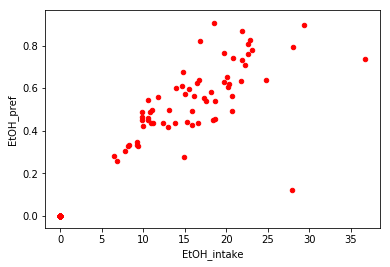

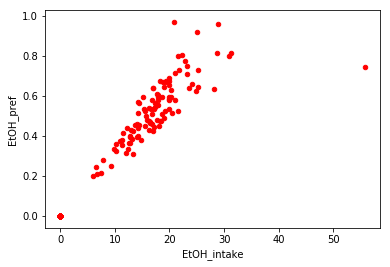

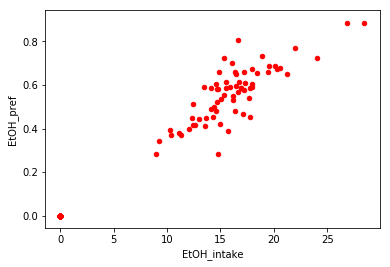

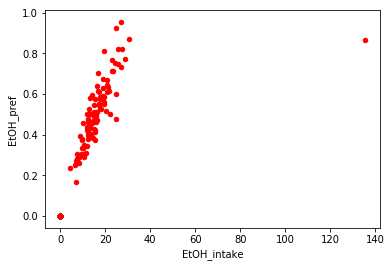

In [106]:
data_table_calc.groupby(['Group']).plot(kind='scatter',x='EtOH_intake',y='EtOH_pref',color='red')
plt.show()

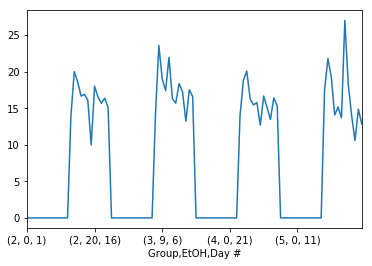

In [124]:
data_table_calc.groupby(['Group', 'EtOH', 'Day #'])['EtOH_intake'].mean().plot(kind='line')

In [129]:
writer = pd.ExcelWriter('data_table_calc.xlsx', engine='xlsxwriter')
data_table_calc.to_excel(writer, sheet_name='Sheet1')
writer.save()